In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
import torchvision
import torchvision.transforms as transforms

from PIL import Image

data_path = "images/train/"

products = pd.read_csv("products.csv")

# label list
classes = np.unique(products['GS1 Form'])

# Define relevant variables for the ML task
batch_size = 64
num_classes = len(classes)
learning_rate = 0.01
num_epochs = 10

# normalizing data ...
transform = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])

# Device will determine whether to run the training on GPU or CPU.
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [66]:
"""Loading data with PyTorch"""

# loading data
train_data = torchvision.datasets.ImageFolder(root=data_path, 
                                              transform=transform)

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = batch_size,
                                           shuffle = True)

In [49]:
"""AI generated CNN"""

# import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(50176, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [50]:
"""AI generated optimizer"""

import torch.optim as optim

cnn = CNN() # define your CNN
optimizer = optim.Adam(cnn.parameters(), lr=0.001) # define the optimizer

In [51]:
"""Neural network training"""

# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        # images = images.to(device)
        # labels = labels.to(device)
        
        images = images.to()
        labels = labels.to()
        
       # forward pass
        output = cnn(images) # pass the input data through the network
        loss = F.cross_entropy(output, labels) # compute the cross-entropy loss

        # backward pass
        optimizer.zero_grad() # zero the gradient buffers
        loss.backward() # compute the gradients
        optimizer.step() # update the network's parameters


    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/10], Loss: 1.2298
Epoch [2/10], Loss: 0.2977
Epoch [3/10], Loss: 0.0090
Epoch [4/10], Loss: 0.5318
Epoch [5/10], Loss: 0.0679
Epoch [6/10], Loss: 0.6999
Epoch [7/10], Loss: 0.0364
Epoch [8/10], Loss: 0.0020
Epoch [9/10], Loss: 0.0041
Epoch [10/10], Loss: 0.0008


In [53]:
# saving model
torch.save(cnn.state_dict(), "models/model_ai.pth")
print("Saved current model.")

Saved current model.


In [79]:
# """Network's accuracy"""

# """Work in progress"""

# cnn.eval() # put the network into evaluation mode

# with torch.no_grad(): # disable gradient calculation
#     for images, labels in train_data:
        
#         # pass the test data through the network
#         output = cnn(images)

#         # compute the accuracy by comparing the predicted labels to the true labels
#         acc = (output.argmax(dim=1) == labels).float().mean()

# print('Test accuracy: {:.2f}%'.format(acc * 100))

In [56]:
# loading model
cnn = CNN()
cnn.load_state_dict(torch.load("models/model_ai.pth"))

<All keys matched successfully>

bottle 



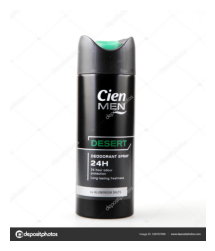

In [63]:
# prediction testing

img_path = 'images/test/test_6.jpg'

img = Image.open(img_path)
img = transform(img)
img = img.view(1, 3, 32, 32)

output = cnn(img)

prediction = int(torch.max(output.data, 1)[1].numpy())

print(classes[prediction], '\n')

plt.figure(figsize=(3,3))
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()